In [4]:
from qiskit import *
from qiskit_aer import AerSimulator

The *Collapse Postulate* or *Copenhagen's Interpretation* of quantum mechanics states that the wave function of a particle **collapses to a single point** when it is **measured.** This is a very controversial topic in quantum mechanics, and many physicists have proposed alternative interpretations of quantum mechanics that don't involve wave function collapse. *Schrödinger's Cat* is a famous thought experiment that was proposed to illustrate the absurdity of the Collapse Postulate.

The radioactive isotope is initially represented by an entangled qubit $$\ket{+}=\frac 1{\sqrt 2}(\ket{0}+\ket{1})$$ and the cat, a classical bit. The qubit is in a superposition of the states "decayed" and "undecayed". When the qubit is measured, the wavefunction collapses, and the cat is either dead or alive. Plus-state entanglement can be accomplished through a Hadamard Gate operating on the $\ket{0}$ state, as $H\ket{0}=\ket{+}$.

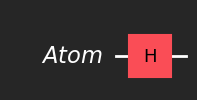

In [3]:
qr_atom = QuantumRegister(1, 'Atom')
qc = QuantumCircuit(qr_atom)
qc.h(qr_atom[0])

qc.draw('mpl', style = 'iqx-dark')

In [5]:
qc.measure_all()

backend = AerSimulator()
result = backend.run(qc).result()
print(result.get_counts())

{'1': 505, '0': 519}


This is an approximately 50-50 split, which makes sense. Now, a CNOT Gate can be applied to the cat's qubit so that the cat's state is entangled with the qubit's:$$\frac 1{\sqrt 2}(\ket{0}+\ket{1})\otimes\ket{0}=\frac 1{\sqrt 2}(\ket{00}+\ket{11})$$ forming a *Bell State* $\ket{\Phi^+}$.

In [8]:
qr_cat = QuantumRegister(1, 'Cat')
qc = QuantumCircuit(qr_atom, qr_cat)

qc.h(qr_cat[0])
qc.cx(qr_atom[0], qr_cat[0])

qc.measure_all()

This forms an entangled quantum system where the cat is
1. Alive if the qubit is in state $\ket{0}$ (undecayed), and
2. Dead if the qubit is in state $\ket{1}$ (decayed).

In [9]:
result = backend.run(qc).result()
print(result.get_counts())

{'00': 498, '10': 526}


And this tells us that the cat is in a superposition of being alive and dead. This is the essence of Schrödinger's Cat.

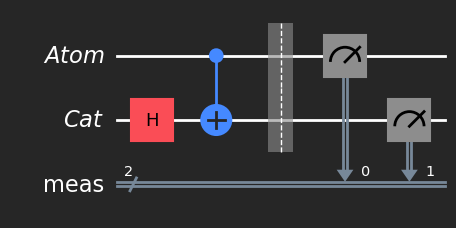

In [10]:
qc.draw('mpl', style = 'iqx-dark')

If we run the circuit now after measurement, we'll obtain either $\ket{00}$ or $\ket{11}$ with approximately equal chances:

In [18]:
result = backend.run(qc, shots = 1).result()
print(result.get_counts())

{'00': 1}


If an observer (perhaps Schrödinger himself) measures the qubit...

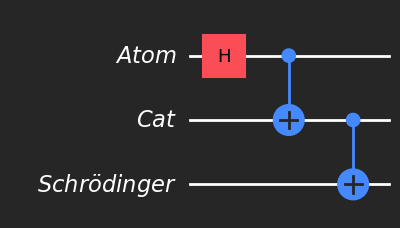

In [19]:
qr_observer = QuantumRegister(1, 'Schrödinger')
qc = QuantumCircuit(qr_atom, qr_cat, qr_observer)

qc.h(qr_atom[0])
qc.cx(qr_atom[0], qr_cat[0])
qc.cx(qr_cat[0], qr_observer[0])

qc.draw('mpl', style = 'iqx-dark')


Think of Schrödinger's qubit as kind of like his memory. If the qubit's in $\ket{0}$, he'll remember that the cat is alive, if it's in $\ket{1}$, he'll remember that the cat is dead; this is until he opens the box:$$\frac 1{\sqrt 2}{\ket{0}+\ket{1}}\otimes\ket{0}\otimes\ket{0}=\ket{\Phi^+}\otimes\ket{0}=\frac 1{\sqrt 2}(\ket{000}+\ket{111})$$

This recognizable pattern is characteristic of the fact that if there are multiple observers, they will all agree on the state of the system. This is a property of entanglement:$$\ket{+}\otimes\ket{0}\otimes\ket{0}\otimes\cdots\otimes\ket{0}=\frac 1{\sqrt 2}(\ket{00\cdots 0}+\ket{11\cdots 1})$$

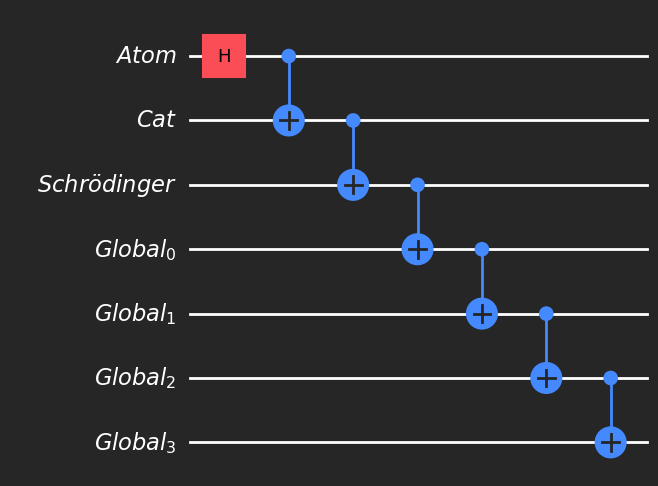

In [22]:
qr_global = QuantumRegister(4, 'Global')
qc = QuantumCircuit(qr_atom, qr_cat, qr_observer, qr_global)

qc.h(qr_atom[0])
qc.cx(qr_atom, qr_cat)
qc.cx(qr_cat[0], qr_observer[0])

qc.cx(qr_observer, qr_global[0])
qc.cx(qr_global[0], qr_global[1])
qc.cx(qr_global[1], qr_global[2])
qc.cx(qr_global[2], qr_global[3])

qc.draw('mpl', style = 'iqx-dark')

In [23]:
qc.measure_all()

result = backend.run(qc).result()
print(result.get_counts())

{'1111111': 542, '0000000': 482}


In the *Everett/Many-Worlds Interpretation* of quantum mechanics, the wavefunction **never collapses,** and the universe splits into two branches: one where the cat is alive, and one where the cat is dead. This 'fact' is agreed upon by **all observers.**

*Decoherence* is the process of the wavefunction splitting into two branches and becoming entangled with the environment, and it is the reason why we don't see macroscopic superpositions in everyday life. Overcoming the challenges posed by Decoherence by continuously maximally isolating quantum systems, is a major goal of quantum computing research.

What if measurement causes an irreversible collapse of the wavefunction...?

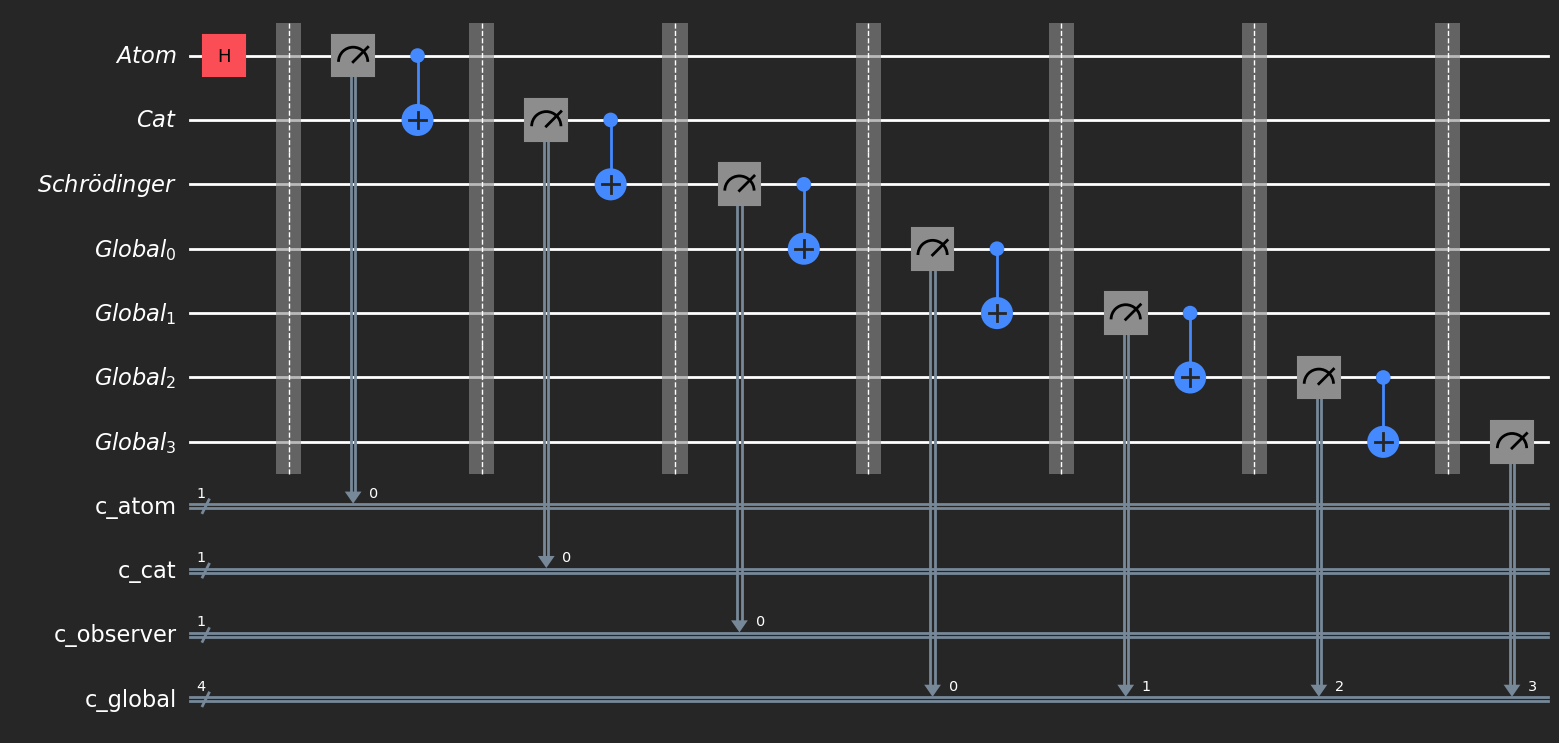

In [25]:
cr_atom = ClassicalRegister(1, 'c_atom')
cr_cat = ClassicalRegister(1, 'c_cat') 
cr_observer = ClassicalRegister(1, 'c_observer')
cr_global = ClassicalRegister(4, 'c_global')

qc = QuantumCircuit(qr_atom, qr_cat, qr_observer, qr_global, cr_atom, cr_cat, cr_observer, cr_global)

qc.h(qr_atom[0])
qc.barrier()
qc.measure(qr_atom[0], cr_atom[0])
qc.cx(qr_atom, qr_cat)

qc.barrier()
qc.measure(qr_cat[0], cr_cat[0])
qc.cx(qr_cat[0], qr_observer[0])

qc.barrier()
qc.measure(qr_observer[0], cr_observer[0])
qc.cx(qr_observer, qr_global[0])

for i in range(3):
    qc.barrier()
    qc.measure(qr_global[i], cr_global[i])
    qc.cx(qr_global[i], qr_global[i + 1])

qc.barrier()
qc.measure(qr_global[3], cr_global[3])

qc.draw('mpl', style = 'iqx-dark')

The barriers in the representation are positions where irreversible collapse has a feasible chance of occurring.

In [26]:
result = backend.run(qc).result()
print(result.get_counts())

{'0000 0 0 0': 529, '1111 1 1 1': 495}


The Density Matrix for the atom, cat, and observer's qubits is the **same,** given by $$\rho=\ket{\Phi^+}\bra{\Phi^+}\otimes\ket{0}\bra{0}=\frac 12(\ket{000}\bra{000}+\ket{111}\bra{111})$$